# KLM Report

We evaluated the effectiveness of our custom KLM operators by conducting a user study. We determined four tasks participants had to complete and compared the task completion times of these participants to the times calculated by the original KLM-model and our custom KLM-model.

We used a calculator programm to conduct our study. The calculator can be operated using the mouse and on-screen buttons, or by using a keyboard. This distinction between method of input is the indepenent varibale for our experiment. We test two different equations:

- adding the numbers from 1 to 20
- calculating the result of (3<sup>2</sup>+4<sup>2</sup>)∗15.2 

Participants have to input each of these equations using only the mouse, and only the keyboard. This makes for a total of four condtitions: mouse input/equation 1 (M1), mouse input/equation 2 (M2), keyboard input/equation 1 (K1) and keyboard input/equation 2 (K2). We do not use the equation as a independent variable, because we do not think the two equations are comparable in terms of input time and complexitiy. This setup allows us to compare task completion times with the times calculated by the KLM-models, and also to see if there is a difference between input times when using a mouse versus using a keyboard.

We want to compare task completion times for input done by experienced users of the calculator program. To ensure a high enough level of familiarity and experience in our participants, we give them a set of ten equations, which use all of the input needed to complete the actual tasks, for training before taking the real experiment. We also provide all participants with the knowledge needed to complete the tasks in the way we need to ensure comparability with the KLM-models. This means participants have to know how to correctly enter 3<sup>2</sup> into the calculator. We require participants to write 3 ** 2 (without whitespaces) to correctly evaluate the equation. The set of training equations, of which participnats have to compelete five using a mouse, and the other 5 using a keyboard, is the following:

- 1+(2*3)/4
- (333-666+222)*(-1)
- 42/2+(84/4)
- 1+2<sup>2</sup>+3<sup>3</sup>
- 4<sup>2</sup>-(7+4.8)
- 5.2+123-70
- 1.23*4.56/7.89
- (8<sup>2</sup>+9<sup>2</sup>)/10<sup>2</sup>
- 1+(4.2*2.4)/9
- 22.2+2/2*(2<sup>2</sup>)

Because we use a within-subjects design where all participants have to complete all four conditions, we counterbalance the order of trials using balanced latin squares, in order to minimize carry-over- and learning-effects. The control variables for the experiment consist of the already mentioned unified training and introduction for all participants, as well as the same technical setup (computer, mouse, keyboard) and setting (laboratory) for all participants. Random varibales are unexpected disturbance of the participants and unexpected hardware or software malfunctions. Order of trials for all four participants is as follows:

- Participant 1: M1 M2 K2 K1
- Participant 2: M2 K1 M1 K2
- Participant 3: K1 K2 M2 M1
- Participant 4: K2 M1 K1 M2

## Calculation of Task Completion Times using KLM-Models

In [92]:
# import of calculator for KLM-times
from klm import KLM

# ini-files with order of operators for the given tasks
operators_task_7_4_1 = "operators_task_7_4_1.ini"
operators_task_7_4_2 = "operators_task_7_4_2.ini"
operators_task_7_4_3 = "operators_task_7_4_3.ini"
operators_task_7_4_4 = "operators_task_7_4_4.ini"

In [93]:
# Calculate time for task 7.4.1: adding the numbers from 1 to 20 using only the mouse
klm_7_4_1 = KLM(operators_task_7_4_1)

K: 0 P: 49 B: 100 M: 0 H: 0
Prediction using original KLM: 63.9s
Prediction using custom values: 46.24s


In [94]:
# Calculate time for task 7.4.2: adding the numbers from 1 to 20 using only the keyboard
klm_7_4_2 = KLM(operators_task_7_4_2)

K: 40 P: 0 B: 0 M: 0 H: 0
Prediction using original KLM: 11.2s
Prediction using custom values: 13.2s


In [95]:
# Calculate time for task 7.4.3: calculating the result of (3**2+4**2)∗15.2 using only the mouse
klm_7_4_3 = KLM(operators_task_7_4_3)

K: 0 P: 14 B: 32 M: 0 H: 0
Prediction using original KLM: 18.6s
Prediction using custom values: 13.52s


In [96]:
# Calculate time for task 7.4.3: calculating the result of (3**2+4**2)∗15.2 using only the keyboard
klm_7_4_4 = KLM(operators_task_7_4_4)

K: 17 P: 0 B: 0 M: 0 H: 0
Prediction using original KLM: 4.76s
Prediction using custom values: 5.61s


## Task Completions Times from User Study

In [97]:
%matplotlib inline
from pylab import *
import numpy as np

In [98]:
# Complete logs can be found in test-results.txt

# Individual task completion times calculated with timestamp_last_input - timestamp_first_input
m1_times = [27502, 29457, 29163, 29919]
m2_times = [9659, 9701, 9525, 13846]
k1_times = [16432, 15560, 19747, 24639]
k2_times = [10388, 8847, 8334, 12016]

ID = range(len(m1_times) + 1)[1:]

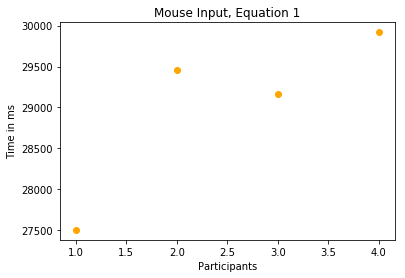

In [99]:
scatter(ID, m1_times, color = 'orange')
title("Mouse Input, Equation 1")
ylabel("Time in ms")
xlabel("Participants")
show()

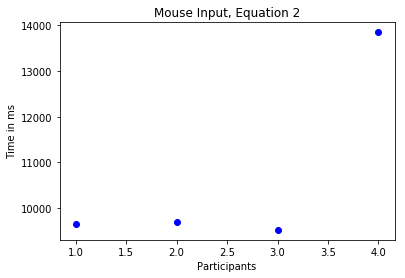

In [100]:
scatter(ID, m2_times, color = 'blue')
title("Mouse Input, Equation 2")
ylabel("Time in ms")
xlabel("Participants")
show()

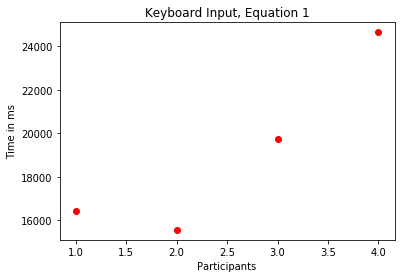

In [101]:
scatter(ID, k1_times, color = 'red')
title("Keyboard Input, Equation 1")
ylabel("Time in ms")
xlabel("Participants")
show()

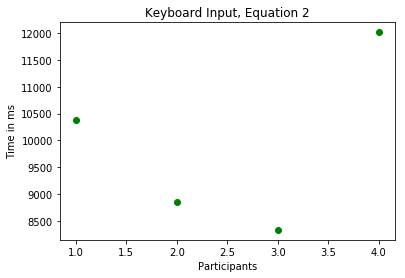

In [102]:
scatter(ID, k2_times, color = 'green')
title("Keyboard Input, Equation 2")
ylabel("Time in ms")
xlabel("Participants")
show()

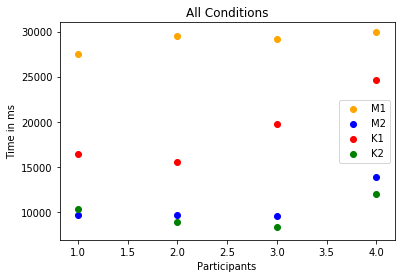

In [103]:
m1_scatter = scatter(ID, m1_times, color = 'orange')
m2_scatter = scatter(ID, m2_times, color = 'blue')
k1_scatter = scatter(ID, k1_times, color = 'red')
k2_scatter = scatter(ID, k2_times, color = 'green')
title("All Conditions")
legend((m1_scatter, m2_scatter, k1_scatter, k2_scatter),
      ('M1','M2','K1','K2'))
ylabel("Time in ms")
xlabel("Participants")
show()

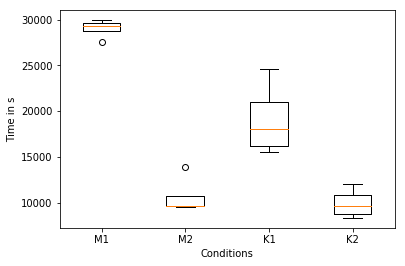

In [104]:
boxplot([m1_times, m2_times, k1_times, k2_times])
xticks([1,2,3,4], ['M1','M2','K1','K2'])
xlabel("Conditions")
ylabel("Time in s")
show()

## Statistical Evaluation

In [105]:
from scipy.stats import ttest_ind, ttest_rel

In [106]:
# t-test to compare Question 1 and Question 2

q1_condition = m1_times + k1_times
q2_condition = m2_times + k2_times

t_statistic, p_value = ttest_rel(q1_condition, q2_condition)
print("p-value: %2.30f" %(p_value))

p-value: 0.000188258158164298646615117394


In [107]:
# t-test to compare mouse input and keyboard input

m_condition = m1_times + m2_times
k_condition = k1_times + k2_times

t_statistic, p_value = ttest_rel(m_condition, k_condition)
print("p-value: %2.30f" %(p_value))

p-value: 0.027740656629243291841913077178


## Comparison of Model and Experiment Times

In [108]:
# times calculated by the original and our model

klm_7_4_1_og_times, klm_7_4_1_custom_times = (63.90*1000, 46.24*1000)
klm_7_4_2_og_times, klm_7_4_2_custom_times = (11.20*1000, 13.20*1000)
klm_7_4_3_og_times, klm_7_4_3_custom_times = (18.60*1000, 13.52*1000)
klm_7_4_4_og_times, klm_7_4_4_custom_times = (4.76*1000, 5.61*1000)

og_times = [klm_7_4_1_og_times, klm_7_4_2_og_times, klm_7_4_3_og_times, klm_7_4_4_og_times]
custom_times = [klm_7_4_1_custom_times, klm_7_4_2_custom_times, klm_7_4_3_custom_times, klm_7_4_4_custom_times]
experiment_times = [mean(m1_times), mean(k1_times), mean(m2_times), mean(k2_times)]

Experiment and Original Model: p-value: 0.000000000792189858042503062250
Experiment and Custom Model: p-value: 0.000000054017387787427074154027


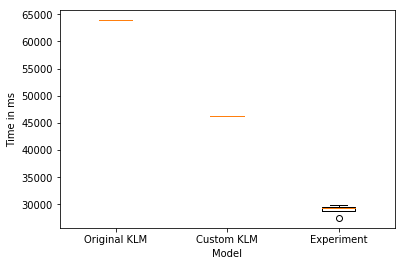

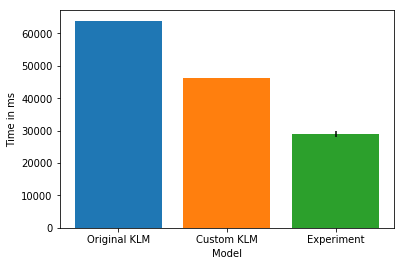

In [109]:
t_statistic, p_value = ttest_ind(m1_times, [klm_7_4_1_og_times]*4)
print("Experiment and Original Model: p-value: %2.30f" %(p_value))

t_statistic, p_value = ttest_ind(m1_times, [klm_7_4_1_custom_times]*4)
print("Experiment and Custom Model: p-value: %2.30f" %(p_value))

boxplot([[klm_7_4_1_og_times]*4, [klm_7_4_1_custom_times]*4, m1_times])
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

bar(1, mean([klm_7_4_1_og_times]*4), yerr=std([klm_7_4_1_og_times]*4))
bar(2, mean([klm_7_4_1_custom_times]*4), yerr=std([klm_7_4_1_custom_times]*4))
bar(3, mean(m1_times), yerr=std(m1_times))
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

Experiment and Original Model: p-value: 0.008570288295740174228098950948
Experiment and Custom Model: p-value: 0.028564355751705076263968763328


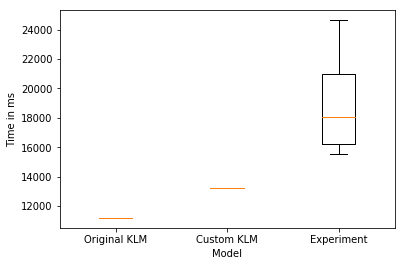

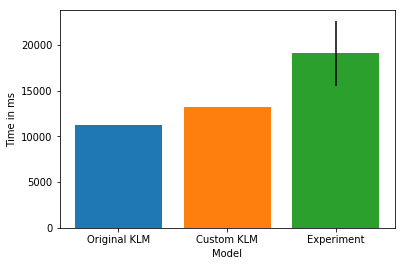

In [110]:
t_statistic, p_value = ttest_ind(k1_times, [klm_7_4_2_og_times]*4)
print("Experiment and Original Model: p-value: %2.30f" %(p_value))

t_statistic, p_value = ttest_ind(k1_times, [klm_7_4_2_custom_times]*4)
print("Experiment and Custom Model: p-value: %2.30f" %(p_value))

boxplot([[klm_7_4_2_og_times]*4, [klm_7_4_2_custom_times]*4, k1_times])
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

bar(1, mean([klm_7_4_2_og_times]*4), yerr=std([klm_7_4_2_og_times]*4))
bar(2, mean([klm_7_4_2_custom_times]*4), yerr=std([klm_7_4_2_custom_times]*4))
bar(3, mean(k1_times), yerr=std(k1_times))
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

Experiment and Original Model: p-value: 0.000289736502481704105357862566
Experiment and Custom Model: p-value: 0.036094851389785097273144032215


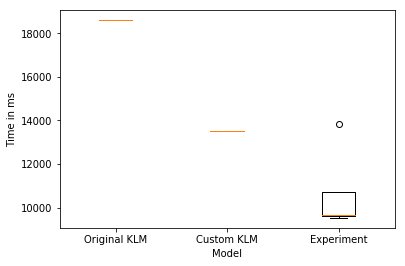

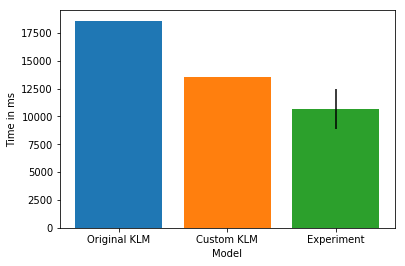

In [111]:
t_statistic, p_value = ttest_ind(m2_times, [klm_7_4_3_og_times]*4)
print("Experiment and Original Model: p-value: %2.30f" %(p_value))

t_statistic, p_value = ttest_ind(m2_times, [klm_7_4_3_custom_times]*4)
print("Experiment and Custom Model: p-value: %2.30f" %(p_value))

boxplot([[klm_7_4_3_og_times]*4, [klm_7_4_3_custom_times]*4, m2_times])
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

bar(1, mean([klm_7_4_3_og_times]*4), yerr=std([klm_7_4_3_og_times]*4))
bar(2, mean([klm_7_4_3_custom_times]*4), yerr=std([klm_7_4_3_custom_times]*4))
bar(3, mean(m2_times), yerr=std(m2_times))
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

Experiment and Original Model: p-value: 0.000822298690178441477396931170
Experiment and Custom Model: p-value: 0.002092553897346110646643380093


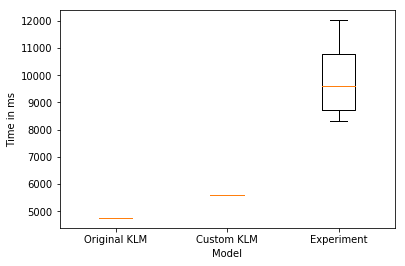

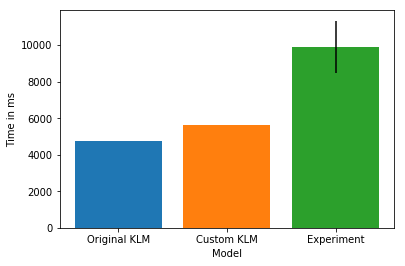

In [112]:
t_statistic, p_value = ttest_ind(k2_times, [klm_7_4_4_og_times]*4)
print("Experiment and Original Model: p-value: %2.30f" %(p_value))

t_statistic, p_value = ttest_ind(k2_times, [klm_7_4_4_custom_times]*4)
print("Experiment and Custom Model: p-value: %2.30f" %(p_value))

boxplot([[klm_7_4_4_og_times]*4, [klm_7_4_4_custom_times]*4, k2_times])
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

bar(1, mean([klm_7_4_4_og_times]*4), yerr=std([klm_7_4_4_og_times]*4))
bar(2, mean([klm_7_4_4_custom_times]*4), yerr=std([klm_7_4_4_custom_times]*4))
bar(3, mean(k2_times), yerr=std(k2_times))
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

Experiment and Original Model: p-value: 0.616975441178331474034735038003
Experiment and Custom Model: p-value: 0.814694779869858498599910490157


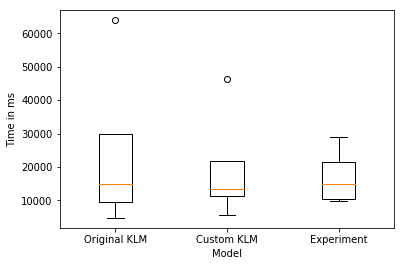

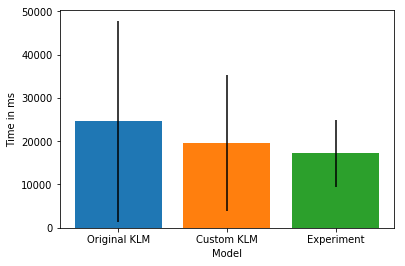

In [113]:
t_statistic, p_value = ttest_ind(experiment_times, og_times)
print("Experiment and Original Model: p-value: %2.30f" %(p_value))

t_statistic, p_value = ttest_ind(experiment_times, custom_times)
print("Experiment and Custom Model: p-value: %2.30f" %(p_value))

boxplot([og_times, custom_times, experiment_times])
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

bar(1, mean(og_times), yerr=std(og_times))
bar(2, mean(custom_times), yerr=std(custom_times))
bar(3, mean(experiment_times), yerr=std(experiment_times))
xticks([1,2,3], ['Original KLM','Custom KLM','Experiment'])
xlabel("Model")
ylabel("Time in ms")
show()

## Discussion of Results

### Comparison of Input Methods

As expected, there is a highly significant difference between the task completion times when comparing the times for equation 1 and equation 2. This difference comes from the different complexities of the euqations, mathematically and more important input-wise. Of higher interest is the difference between the two input methods, mouse and keyboard. Comparing those two reveals, that keyboard input seems to be significantly faster, with a p-level of 0.0277. Looking at the actual task-completion times, and their plots, it also seems that keyboard input really takes off compared to mouse input when longer input is generated. This is illustrated by the fact, that task completion times for the equation two are very similar for both input methods, but for equation 1, which has a lot more operators, keyboard input is clearly faster.

### Comparison of Model and Experiment Times

The main goal of this study was to evaluate the KLM-models, the original and the one with our custom operator times, by comparing their calculated task completion times to the ones determined by the experiment. The overall result of this comparison is, that the models miss the actual times for task completion by quite a bit. The times calculated by the original KLM-model are significantly different from the actual task completion times from the experiment with p < 0.005 for all four conditions. Our custom model is only a little bit better, with the K1 and M2 conditions having a p-level of 0.028 and 0.036 respectivly, which is still very low. An interesting trend to notice is, that the theoretical models predicted higher task completion times for mouse input, and lower task completion times for keyboard input. This means, that if we were to improve our model, we needed to adjust the operator times by making the time for the keystroke-operator higher, and the time for mouse-presses and especially mouse-pointing lower.